In [160]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy.sparse as sps
import scipy.optimize as sco

# Polynome de degré 2

In [161]:
def f(x):
    return 0.1*x**2 + np.cos(x/2)-np.exp(-x/4) + 2.1

def g(x):
    return x**2 + 0.1

def h(x):
    return np.cos(x) + 2

fonctions_test = [f,g,h]

In [162]:
def a(x,f) :
    return np.sqrt(f(0)) * (1-x) - np.sqrt(f(1)) * x

def p2(x,a1,sqrtb0):
    return a1**2 + x*(1-x)*sqrtb0
    
def approx_p2(x,f):
    xstar = np.sqrt(f(0))/ (np.sqrt(f(0)) + np.sqrt(f(1)))
    interp = np.array([0,1,xstar])
    
    a1 = a(x,f)
    sqrtb0 =  f(xstar) / (xstar *(1-xstar) )  
    return p2(x,a1,sqrtb0), interp


In [163]:
def test_approx2(f):
    x = np.linspace(0,1,101)
    px, interp = approx_p2(x,f)
    plt.plot(x,f(x))
    plt.plot(x,px)
    plt.plot(interp, f(interp),'ob')
    plt.show()


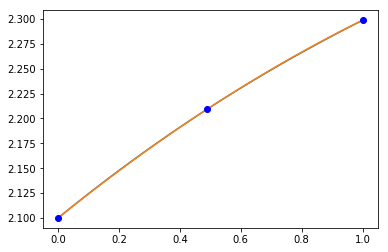

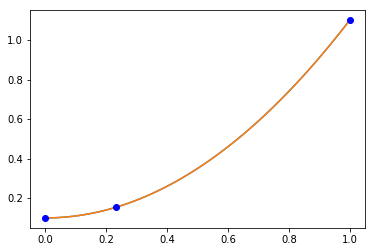

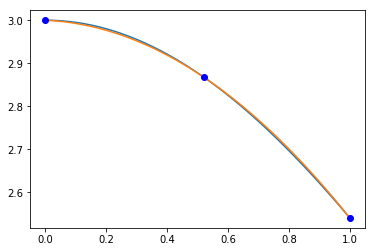

In [164]:
for fonctions in fonctions_test : 
    test_approx2(fonctions)

# Polynome de degré 3

In [165]:
def f(x):
    return 2*x**3 + x**2 + 2 

def g(x):
    return x**3 + 0.1

def h(x):
    return np.cos(x)

fonctions_test = [f,g,h]

In [166]:
def phi(beta,f) : 
    return beta * np.sqrt((1-beta)*f(0)) / (np.sqrt((1-beta)*f(0)) + np.sqrt(f(beta))) 

def psi(alpha,f):
    return  (alpha * np.sqrt(alpha*f(1)) + np.sqrt(f(alpha)) ) / (np.sqrt(alpha*f(1)) + np.sqrt(f(alpha)))

def K(alpha, beta,f):
    phi_beta = phi(beta,f)
    psi_alpha = psi(alpha,f)
    return np.array([phi_beta, psi_alpha])

def T(alpha,f):
    return alpha - phi(psi(alpha,f),f)

In [167]:
def p3(x,a1,b1):
    return x * a1**2 + (1-x)* b1**2

def approx_p3(x,f):
    alpha = sco.newton(T,1/4,args=(f,))
    beta = psi(alpha,f)
    interp = np.array([0,1,alpha,beta])
    
    a1 = np.sqrt(f(1))* (x- alpha)/(1-alpha) - np.sqrt(f(alpha)/alpha) * (1-x)/(1-alpha)
    b1 = np.sqrt(f(beta)/(1-beta)) * x/beta - np.sqrt(f(0)) * (beta-x)/(beta)
    return p3(x,a1,b1), interp

In [168]:
def test_approx3(f):
    x = np.linspace(0,1,101)
    px, interp = approx_p3(x,f)
    plt.plot(x,f(x))
    plt.plot(x,px)
    plt.plot(interp, f(interp),'ob')
    plt.show()

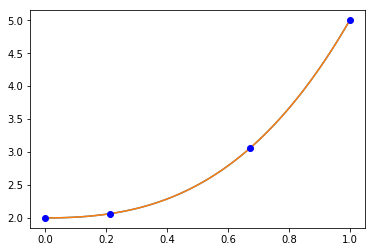

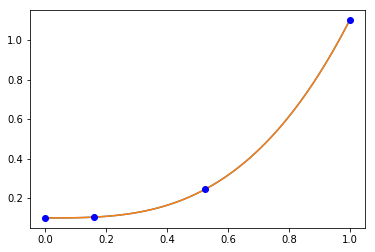

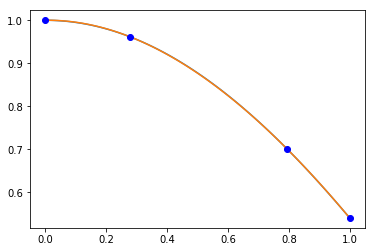

In [169]:
for fonctions in fonctions_test : 
    test_approx3(fonctions)

# Polynome de degré 3 avec $h$

In [170]:
def f(x,h):
    x = x*h
    return 2*x**3 + x**2 + 2 

def g(x,h):
    x = x*h
    return x**3 + 0.1

def h(x,h):
    x = x*h
    return np.cos(x)

fonctions_test = [f,g,h]

In [171]:
def phih(beta,f,h) : 
    return beta * np.sqrt((1-beta)*f(0,h)) / (np.sqrt((1-beta)*f(0,h)) + np.sqrt(f(beta,h))) 

def psih(alpha,f,h):
    return  (alpha * np.sqrt(alpha*f(1,h)) + np.sqrt(f(alpha,h)) ) / (np.sqrt(alpha*f(1,h)) + np.sqrt(f(alpha,h)))

def Kh(alpha, beta,f,h):
    phi_beta = phih(beta,f,h)
    psi_alpha = psih(alpha,f,h)
    return np.array([phi_beta, psi_alpha])

def Th(alpha,f,h):
    return alpha - phih(psih(alpha,f,h),f,h)

In [172]:
def p3h(x,a1,b1,h):
    return x * a1**2 + (1-x)* b1**2

def approx_p3h(x,f,h):
    alpha = sco.newton(Th,1/4,args=(f,h,))
    beta = psih(alpha,f,h)
    interp = np.array([0,1,alpha,beta]) 
    
    a1 = np.sqrt(f(1,h)) * (x - alpha)/(1-alpha) - np.sqrt(f(alpha,h)/alpha) * (1-x)/(1-alpha)
    b1 = np.sqrt(f(beta,h)/(1-beta)) * x/beta - np.sqrt(f(0,h)) * (beta-x)/(beta)
    return p3h(x,a1,b1,h), interp

In [173]:
def test_approx3h(f,h):
    x = np.linspace(0,1,101)
    px, interp = approx_p3h(x,f,h)
    plt.plot(x,f(x,h))
    plt.plot(x,px)
    plt.plot(interp, f(interp,h),'ob')
    plt.show()

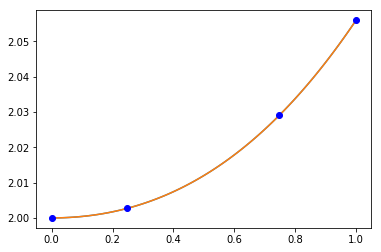

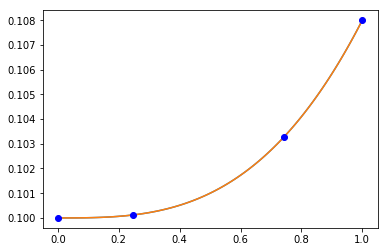

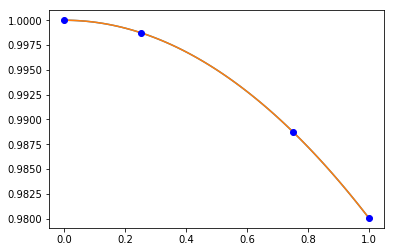

In [174]:
h = 0.2
for fonctions in fonctions_test : 
    test_approx3h(fonctions,h)

# Polynome de degré $n = 2p + 1$ 

## Operateur S

In [175]:
def S (p,eps,X0):
    # séparation en alpha et beta
    alpha = X0[:p]
    beta = X0[p:]

    # creation des delta pour alpha et beta
    delta_alpha = np.concatenate((alpha,[1]))
    delta_alpha[1:] -= alpha
    
    delta_beta = - np.concatenate(([0],beta))
    delta_beta[:-1] += beta
    delta_beta[-1] += 1 
    
    # creation des delta_tilde pour alpha et beta
    delta_alpha_t = np.zeros(p+1)
    delta_beta_t = np.zeros(p+1)
    for i in range (p+1):
        delta_alpha_t[i] = max(delta_alpha[i],2*eps)
        delta_beta_t[i] = max(delta_beta[i],2*eps)

    delta_alpha_t = delta_alpha_t / np.sum(delta_alpha_t)
    delta_beta_t = delta_beta_t / np.sum(delta_beta_t)

    # mise a jour des alpha et beta, directement dans x
    X = np.zeros(2*p)
    X[0] = delta_alpha_t[1]
    X[p] = delta_beta_t[0]
    for i in range (1,p):
        X[i] = X[i-1] + delta_alpha_t[i+1]
        X[i+p] = X[i-1+p] + delta_beta_t[i]
    
    return X

In [176]:
def test_S(a):
    print(a)
    Speps = S(4,0.1,a)
    print(Speps)

    plt.plot(Speps[:4],np.ones(4),'or')
    plt.plot(Speps[4:],np.ones(4),'ob')

[0.1, 0.35, 0.5, 0.8, 0.07, 0.39, 0.65, 0.85]
[0.2173913  0.39130435 0.65217391 0.82608696 0.16949153 0.44067797
 0.66101695 0.83050847]


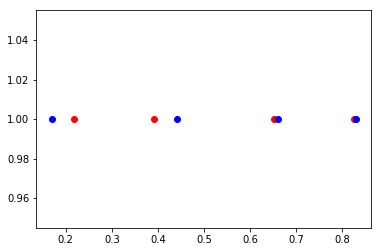

In [177]:
a = [0.1,0.35,0.5,0.8,0.07,0.39,0.65,0.85]
test_S(a)

# Initialisation

In [178]:
def init_X(p):
    i = np.linspace(0,p,p+1)
    X = np.zeros(2*(p+1))
    X[:p+1] = 1/2*(1-np.cos((2*i+1)*np.pi/(2*p+1)))
    X[p+1:] = 1/2*(1-np.cos(2*i*np.pi/(2*p+1)))
    return X

In [179]:
def test_init(p):
    X = init_X(p)
    plt.plot(X[:p+1],np.ones(len(X[:p+1])),'ob')
    plt.plot(X[p+1:],np.ones(len(X[p+1:])),'or')

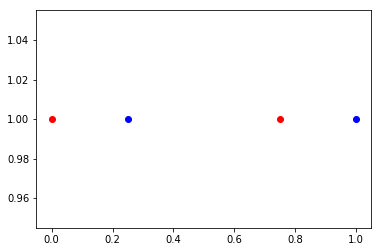

In [180]:
p = 1
test_init(p)

# Algorithme

In [181]:
def f(x,h):
    x = x*h
    return 2*x**3 + x**2 + 2 

def g(x,h):
    x = x*h
    return x**3 + 2

def h(x,h):
    x = x*h
    return np.cos(x)

fonctions_test = [f,g,h]

In [182]:
def Jp(p,f,h,X,epsilon):
    i = np.linspace(0,p-1,p)
    theta_i = 2*(p-i)*np.pi/(2*p+1)
    D_alpha = 2*p*np.cos(p*theta_i)/(np.cos(theta_i)-1) + np.sin(p*theta_i)/np.sin(theta_i) * 2 * (p - 1/(np.cos(theta_i)-1))
    
    i = np.linspace(1,p,p)
    eta_i = (2*(p-i)+1)*np.pi/(2*p+1)
    D_beta = 2*p*np.cos(p*eta_i)/(np.cos(eta_i)+1) + np.sin(p*eta_i)/np.sin(eta_i) * 2* (p + 1/(np.cos(eta_i)+1))

    feps = max( np.max(f(X,h)),epsilon)
    return  np.sqrt(feps) * sps.diags(np.concatenate((D_alpha,D_beta))).toarray()

def b_beta (p,f,h,beta,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(beta[i],h),epsilon)/(1-beta[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - beta[j])/(beta[i]-beta[j])
        somme *= pro
        res  += somme
    return res
  

def a_alpha (p,f,h,alpha,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(alpha[i],h),epsilon)/(alpha[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - alpha[j])/(alpha[i]-alpha[j])
        somme *= pro
        res += somme
    return res
     
def f_theta(X,p,f,h,espilon):
    alpha = X[:p]
    alpha_1 = np.concatenate((alpha,[1]))
    beta = X[p:]
    beta_0 = np.concatenate(([0],beta))
    return np.concatenate(( b_beta(p,f,h,beta_0,alpha,epsilon), a_alpha(p,f,h,alpha_1,beta,epsilon) ))

In [183]:
def Newton_Raphson (p,f,h,epsi,epsilon,eps=1e-12,itermax=100):
    X = init_X(p) 
    X = np.concatenate((X[:p],X[p+2:]))
    k=0
    err=2*eps
    while err > eps and itermax > k :
        X0 = np.copy(X)
        #print(f_theta(X,p,f,h,epsilon))
        d = npl.solve(Jp(p,f,h,X,epsilon),f_theta(X,p,f,h,epsilon))
        X = X - d
        #X = S(p,epsi,X)
        #print(f_theta(X,p,f,h,epsilon))
        k+=1
        err = npl.norm(X-X0)/npl.norm(X0)
    print(k)
    return X


In [184]:
def epsi_S():
    i = np.linspace(0,2*p+1,2*p+2)
    gamma = 1/2*(1-np.cos(i*np.pi/(2*p+1)))
    return min( 1/2/(p+1), np.min((gamma[1:]-gamma[:-1])/3))

def pn(x,ap,bp): 
    return x * ap**2 + (1-x) * bp**2
    
def approxh(x,p,f,h,epsilon):
    epsi = epsi_S()
    #X = sco.fsolve(f_theta,np.array([1/4,3/4]), args=(p,f,h,epsilon))
    #X = S(p,epsi,X)
    X = Newton_Raphson(p,f,h,epsi,epsilon)
    print("ftheta :",f_theta(X,p,f,h,epsilon))
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))

    ap = a_alpha(p,f,h,X[:p+1],x,epsilon)
    bp = b_beta(p,f,h,X[p+1:],x,epsilon)
    
    return pn(x,ap,bp),X

In [185]:
def test_approx(p,f,h,espilon):
    x = np.linspace(0,1,101)
    px, interp = approxh(x,p,f,h,epsilon)
    #
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    '''
    print(Ap)
    print((-1)**p * np.sqrt(f(interp[3],h)/(1-interp[3])))
    print("Bp",Bp)
    print(pn(interp,Ap,Bp))
    '''
    #
    fx = f(x,h) 
    plt.plot(x,fx,label="f(x)")
    plt.plot(x,px,label="p(x)")
    plt.plot(interp,f(interp,h),'ob')
    plt.plot(interp, pn(interp,Ap,Bp),'or')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    
    return px,fx

10
ftheta : [-2.89768209e-14  8.88178420e-16]


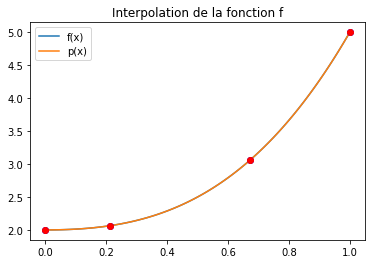

8
ftheta : [-1.69864123e-14  2.22044605e-16]


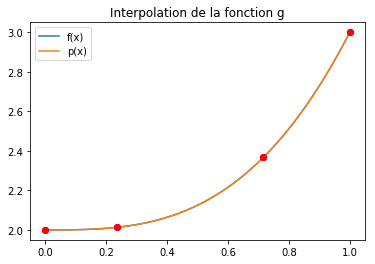

12
ftheta : [-3.56381591e-14 -1.68753900e-14]


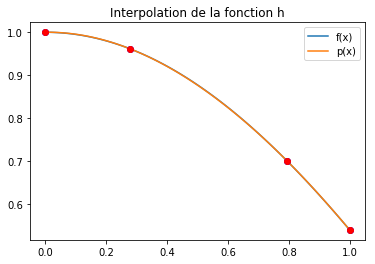

In [186]:
h = 1
p = 1
epsilon=0.001

for fonctions in fonctions_test : 
    test_approx(p,fonctions,h,epsilon)

Analyse du pb : 

Pb vient de l'opérateur S
- est ce a cause d'une erreur dans S
- ou du fait que S fait pas vraiment parti de Newton

--------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [205]:
def f(x,h):
    x = x*h
    return 2*x**17 + x**10 - x**2 + 2 # - 1.85

def g(x,h):
    x = x*h
    return 0.5 + np.abs(x - 0.5) #- 0.75

def h(x,h):
    x = x*h
    return 1/(1-x) #-1.5

def j(x,h):
    x = x*h
    return 1/ ( 1 + 25*(2*x-1)**2 ) #- 1

def k(x,h):
    x = x*h
    return 10**5 * x**10 * (1-x)**7 #- 1

fonctions_test = [f,g,h,j,k]

8
ftheta : [-3.46944695e-17  1.94289029e-16  0.00000000e+00  1.09912079e-14
 -1.97175609e-13  1.11022302e-16  7.21644966e-16 -1.01307851e-14
  1.44106949e-13 -2.60458322e-13]


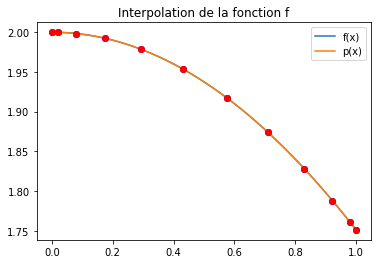

Norme de l'erreur :  n2 = 5.825091642643645e-09  ; ninf =  1.0253644600055623e-09 

15
ftheta : [-2.22044605e-16  1.94289029e-16 -1.66533454e-15  2.26874075e-13
 -4.80016027e-12 -1.24900090e-15  3.30291350e-15 -2.41806575e-13
  4.54114524e-12 -8.92069751e-12]


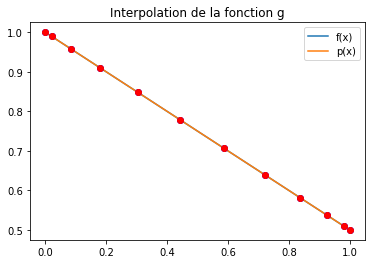

Norme de l'erreur :  n2 = 3.3875449783931883e-15  ; ninf =  1.1102230246251565e-15 

16
ftheta : [ 5.10154766e-12 -5.30647748e-12  9.13435994e-13 -3.60822483e-14
  6.21724894e-15  6.25771657e-12 -8.03870859e-13  1.69586567e-14
 -1.05471187e-15 -1.99840144e-15]


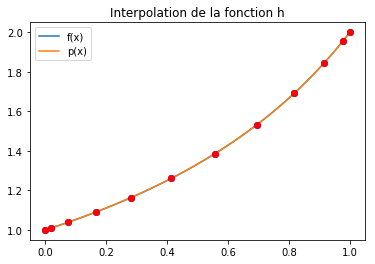

Norme de l'erreur :  n2 = 2.124798062764625e-08  ; ninf =  4.0842926818385195e-09 

72
ftheta : [ 2.56678966e-11 -1.28937555e-11  2.62373456e-13  7.21644966e-16
  0.00000000e+00  4.51087778e-12 -1.46528623e-13  1.14908083e-14
 -4.08006962e-15  0.00000000e+00]


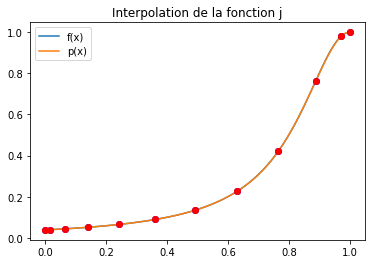

Norme de l'erreur :  n2 = 0.005680105088934321  ; ninf =  0.001749874225260406 

100
ftheta : [ 1.79814166e-05 -6.27214915e-05  7.44272268e-05 -4.37925167e-05
  1.36552845e-06  4.33222498e-05 -4.59185410e-05  1.06362332e-05
 -1.38460672e-07  1.84600866e-07]


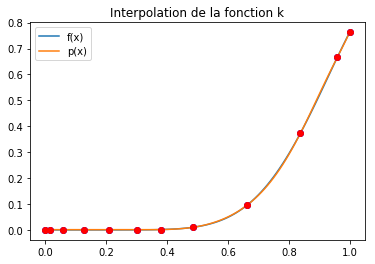

Norme de l'erreur :  n2 = 0.018259135195763273  ; ninf =  0.00481500812071578 



In [206]:
h = 1/2
p = 5
epsilon=0.001

for fonctions in fonctions_test : 
    px,fx = test_approx(p,fonctions,h,epsilon)
    print("Norme de l'erreur :  n2 =", npl.norm(px-fx), " ; ninf = ", npl.norm(px-fx,np.inf),"\n")